In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Left Join city_data to ride_data
pyber_data_df = pd.merge(ride_data_df,city_data_df,how='left',left_on=['city'],right_on=['city'])
#pyber_data_df.head()

In [5]:
# Create the DataFrame for each type of city
urban_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [6]:
# Get the number of rides for each DataFrame for city type
urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_df.groupby(['city']).count()['ride_id']

In [7]:
# Get the average fare for each city
urban_avg_fare = urban_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_df.groupby(['city']).mean()['fare']

In [8]:
# Get the average number of drivers for each city
urban_driver_count = urban_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_df.groupby(['city']).mean()['driver_count']

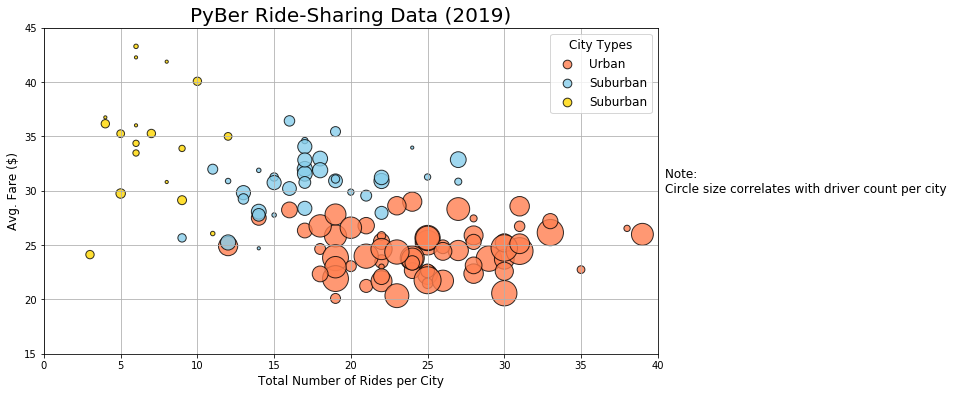

In [9]:
# Prepare Figure and setting size
plt.subplots(figsize=(11,6))
plt.axis([0,40,15,45])

# Add the scatter charts for each type of city
plt.scatter(urban_ride_count, urban_avg_fare
            ,label = 'Urban'
            ,s=urban_driver_count * 10
            ,color = 'coral'
            ,edgecolors = 'black'
            ,linewidths = 1
            ,alpha = 0.8
           )

plt.scatter(suburban_ride_count, suburban_avg_fare
            ,label = 'Suburban'
            ,s=suburban_driver_count * 10
            ,color = 'skyblue'
            ,edgecolors = 'black'
            ,linewidths = 1
            ,alpha = 0.8
           )

plt.scatter(rural_ride_count, rural_avg_fare
            ,label = 'Suburban'
            ,s=rural_driver_count * 10
            ,color = 'gold'
            ,edgecolors = 'black'
            ,linewidths = 1
            ,alpha = 0.8
           )

# Other graph properties
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides per City', fontsize=12)
plt.ylabel('Avg. Fare ($)', fontsize=12)
plt.grid(True)

# Preparing Legends
lgnd = plt.legend(fontsize=12,mode="Expanded",loc='best',scatterpoints=1,title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Adding Notes
plt.text(40.5,30,'Note: \nCircle size correlates with driver count per city',fontsize=12, wrap=True, ha='left')

plt.savefig('Analysis/Fig1.png')

plt.show()

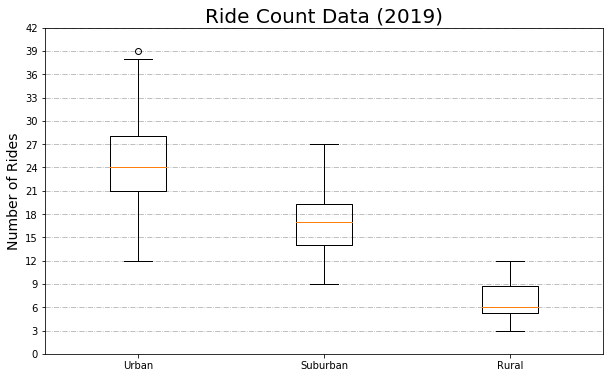

In [10]:
# Create a box-and-whisker plot for the ride count

# Preparing labels and dataframe for ride count
x_labels = city_data_df['type'].unique()
yaxis = []
for type in x_labels:
    yaxis.append(pyber_data_df[pyber_data_df['type'] == type].groupby(['city']).count()['ride_id'])

# Preparing Figure
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(yaxis, labels=x_labels)

# Other Graph Properties
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid(linestyle='-.', axis='y')

# Save and show figure
plt.savefig('Analysis/Fig2.png')
plt.show()

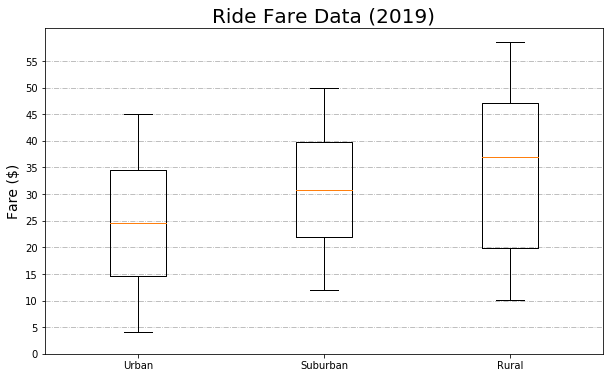

In [11]:
# Create a box-and-whisker plot for the average fare

# Preparing labels and dataframe for ride count
x_labels = city_data_df['type'].unique()
yaxis = []
for type in x_labels:
    yaxis.append(pyber_data_df[pyber_data_df['type'] == type]['fare'])

# Preparing Figure
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(yaxis, labels=x_labels)

# Other Graph Properties
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($)', fontsize=14)
ax.set_yticks(np.arange(0,60,step=5.0))
ax.grid(linestyle='-.', axis='y')

# Save and show figure
plt.savefig('Analysis/Fig3.png')
plt.show()

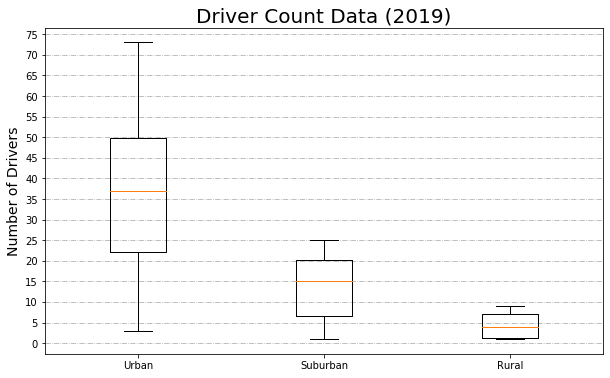

In [12]:
# Create a box-and-whisker plot for the driver count

# Preparing labels and dataframe for ride count
x_labels = city_data_df['type'].unique()
yaxis = []
for type in x_labels:
    yaxis.append(city_data_df[city_data_df['type'] == type]['driver_count'])

# Preparing Figure
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(yaxis, labels=x_labels)

# Other Graph Properties
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_yticks(np.arange(0,80,step=5.0))
ax.grid(linestyle='-.', axis='y')

# Save and show figure
plt.savefig('Analysis/Fig4.png')
plt.show()

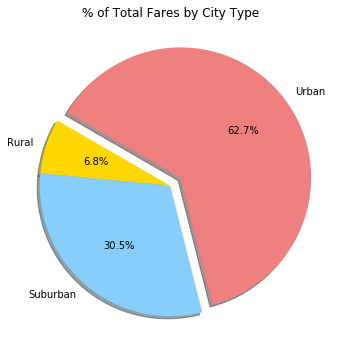

In [13]:
# Get the % of fares for each city type
type_percents = pyber_data_df.groupby(['type']).sum()['fare'] / pyber_data_df['fare'].sum() * 100

# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl

# Make Pie Chart for fare by city type
plt.subplots(figsize=(10,6))
plt.pie(type_percents
        ,labels=['Rural','Suburban','Urban']
        ,colors=['gold','lightskyblue','lightcoral']
        ,explode=[0,0,0.1]
        ,autopct='%1.1f%%'
        ,shadow=True, startangle=150
       )
plt.title('% of Total Fares by City Type')
mpl.rcParams['font.size'] = 14
plt.savefig('Analysis/Fig5.png')
plt.show()

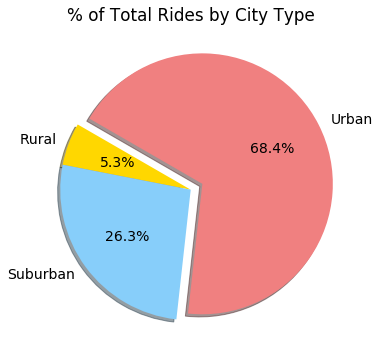

In [14]:
# Get the % of rides for each city type
type_percents = pyber_data_df.groupby(['type']).count()['ride_id'] / pyber_data_df['ride_id'].count() * 100

# Make Pie Chart for ride by city type
plt.subplots(figsize=(10,6))
plt.pie(type_percents
        ,labels=['Rural','Suburban','Urban']
        ,colors=['gold','lightskyblue','lightcoral']
        ,explode=[0,0,0.1]
        ,autopct='%1.1f%%'
        ,shadow=True, startangle=150
       )
plt.title('% of Total Rides by City Type')
mpl.rcParams['font.size'] = 14
plt.savefig('Analysis/Fig6.png')
plt.show()

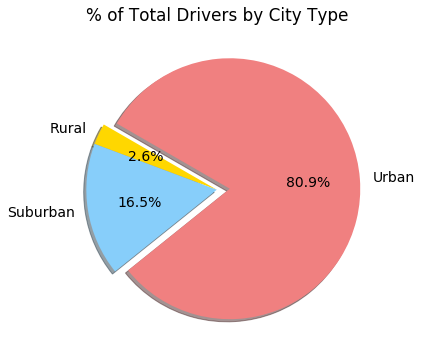

In [15]:
# Get the % of rides for each city type
type_percents = city_data_df.groupby(['type']).sum()['driver_count'] / city_data_df['driver_count'].sum() * 100

# Please note that I used city_data.csv to calculate the percentage of Total Drivers by City Type.
# We used left join to create pyber_data_df, 
# which means driver count would change based on the number of appearance of each city type in ride_data.csv

# Make Pie Chart for ride by city type
plt.subplots(figsize=(10,6))
plt.pie(type_percents
        ,labels=['Rural','Suburban','Urban']
        ,colors=['gold','lightskyblue','lightcoral']
        ,explode=[0,0,0.1]
        ,autopct='%1.1f%%'
        ,shadow=True, startangle=150
       )
plt.title('% of Total Drivers by City Type')
mpl.rcParams['font.size'] = 14
plt.savefig('Analysis/Fig7.png')
plt.show()

In [23]:
ride_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
driver_by_type = city_data_df.groupby(['type']).sum()['driver_count']
totalfare_by_type = pyber_data_df.groupby(['type']).sum()['fare']
avefare_by_type = pyber_data_df.groupby(['type']).mean()['fare']
avefare_by_driver = totalfare_by_type / driver_by_type
avefare_by_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64